# **Data Visualization**


This assignment will be focusing on the visualization of data.

The data set will be presented to in the form of a RDBMS.

will use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


##How to work with database


Download database file.


In [ ]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

#the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


##list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


##describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


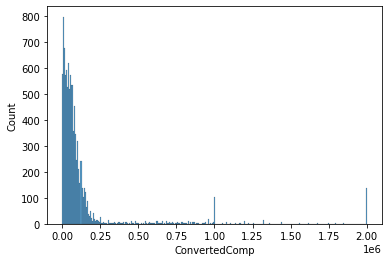

In [ ]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
ax = sns.histplot(df['ConvertedComp'])

### Box Plots


Plot a box plot of `Age.`


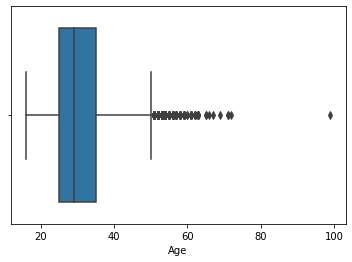

In [ ]:
# your code goes here

sns. boxplot(x=df.Age, data =df)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


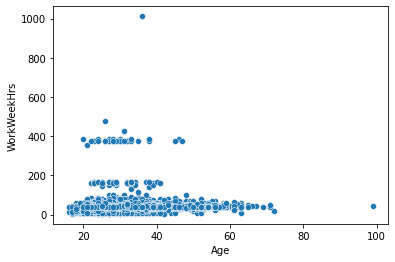

In [ ]:
# your code goes here

sns.scatterplot(df['Age'],df['WorkWeekHrs'])

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


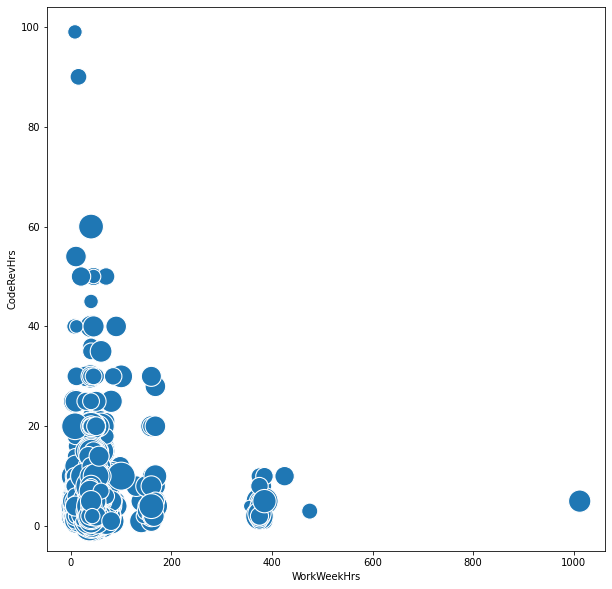

In [ ]:
# your code goes here

plt.figure(figsize= (10,10))
sns.scatterplot(data=df, x="WorkWeekHrs", y="CodeRevHrs", size="Age", legend=False, sizes=(20, 2000))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS NUM
FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear
ORDER BY NUM DESC
LIMIT 5
"""

conn = sqlite3.connect("m4_survey_data.sqlite")
df = pd.read_sql_query(QUERY,conn)

In [ ]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS NUM
FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear
ORDER BY NUM DESC
"""
conn = sqlite3.connect("m4_survey_data.sqlite")
df = pd.read_sql_query(QUERY,conn)
df

,DatabaseDesireNextYear,NUM
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


In [ ]:
df

,DatabaseDesireNextYear,NUM
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


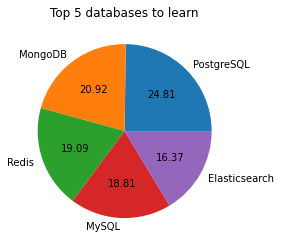

In [ ]:
plt.pie(df['NUM'], labels=df['DatabaseDesireNextYear'], autopct = '%.2f')
plt.title('Top 5 databases to learn')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
# your code goes here
QUERY = """
SELECT AGE, WORKWEEKHRS, CODEREVHRS
FROM MASTER
WHERE AGE BETWEEN 30 AND 35
"""

conn = sqlite3.connect("m4_survey_data.sqlite")
df_stacked = pd.read_sql_query(QUERY,conn)
df_grouped = df_stacked.groupby('Age').median()
df_grouped

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


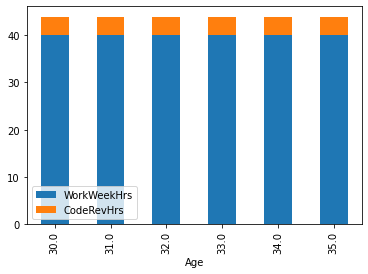

In [ ]:
df_grouped.plot(kind='bar', stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


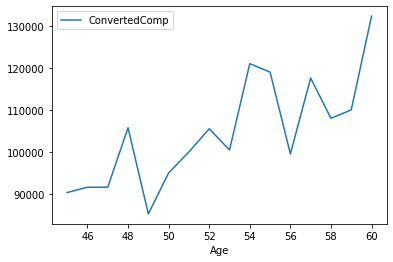

In [ ]:
# your code goes here

QUERY = """
SELECT AGE, CONVERTEDCOMP
FROM MASTER
WHERE AGE BETWEEN 45 AND 60
"""

df_line = pd.read_sql_query(QUERY,conn)
df_grouped = df_line.groupby('Age').median()
df_grouped.plot(kind = 'line')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


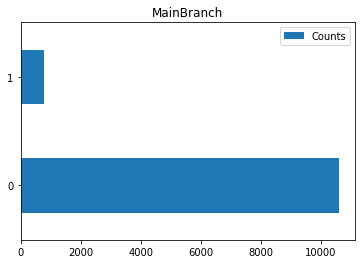

In [ ]:
# your code goes here

QUERY = """
SELECT MainBranch
FROM master
"""
df_mb = pd.read_sql_query(QUERY,conn)
df_cnt=df_mb['MainBranch'].value_counts().rename_axis('MainBranch').reset_index(name='Counts')

df_cnt.plot(kind='barh')
plt.title('MainBranch')
plt.show()

Close the database connection.


In [ ]:
conn.close()